# Milestone 2

## Bab 1 Perkenalan

### 1.1 Identitas

Nama    : Muhamad Bagus Septian

Batch   : FTDS-013

### 1.2 Dataset

Pada penelitian inin dataset yang digunakan adalah dataset burn rate karyawan dari kaggle.

Dataset diakses dari https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out?select=train.csv. 

Dataset kemudian disimpan sebagai sebagai file csv dengan nama file `h8dsft_Milestone2P1_muhamad_bagus_septian.csv`.

### 1.3 Objective

Perusahaan Sukamaju ingin mengetahui tingkat burn out yang dialami karyawannya. Akan tetapi menyewa jasa profesional untuk melakukan assesment membutuhkan biaya yang banyak. Oleh karena itu  Perusahaan meminta bantuan pada data scinetist untuk membuat system yang dapat memprediksi tingkat burn out karyawan.


## Bab 2 Import Libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import pickle

## Bab 3 Data Loading

In [2]:
df = pd.read_csv('h8dsft_Milestone2P1_muhamad_bagus_septian.csv')

### 3.1 Data Overview

In [3]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [4]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3.0,6.0,7.8,0.61


Diketahui dataset terdiri dari variabel sebagai berikut :

Variabel | Definisi
---|---
`Employee ID`| Identifikasi karyawan
`Date of Joining`| Tanggal karyawan mulai bekerja
`Gender`| Jenis kelamin
`Company Type`| Tipe perusahaan
`WFH Setup Availabe`| Apakah terdapat fasilitas work from home
`Designation`| Level jabatan karyawan
`Resource Allocation`| Waktu yang dialokasikan karyawan untuk bekerja dalam sehari
`Mental Fatigue Score`| Skor kelelahan mental karyawan
`Burn Rate`| TIngkat bunr out karyawan

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


- Diketahui dataset terdiri dari 22750 kolom dan 9 baris
- Diketahui terdapat missing value pada kolom `Resource Allocation`, `Mental Fatigue Score`, `Burn Rate`
- Diketahui terdapat 6 data kategorikal dalam dataset yaitu pada kolom `Employee ID`, `Date of Joining`, `Gender`, `Company Type`, `WFH Setup Available`, `Designation`

## Bab 4 Exploratory Data Analysis

Peneliti ingin mengetahui kisaran waktu karyawan mulai bekerja

In [6]:
df['Date of Joining'].sort_values()

7046     2008-01-01
12302    2008-01-01
17558    2008-01-01
9909     2008-01-01
1090     2008-01-01
            ...    
10068    2008-12-31
15234    2008-12-31
12942    2008-12-31
6555     2008-12-31
11040    2008-12-31
Name: Date of Joining, Length: 22750, dtype: object

Diketahui karyawan  paling awal bergabung pada tanggal 1 Januari 2008 dan yang terakhir bergabung pada 31 Desember 2008.

Peneliti ingin mengetahui waktu yang dialokasikan karyawan untuk bekerja.

Text(0.5, 1.0, 'Histogram of Resource Allocation')

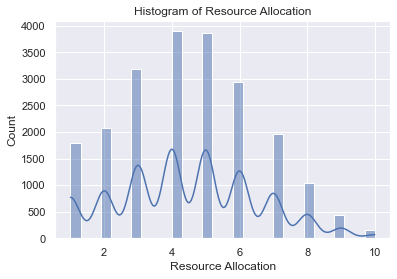

In [7]:
sns.set()
sns.histplot(df['Resource Allocation'], bins=30, kde=True)
plt.title('Histogram of Resource Allocation')

Diketahui waktu yang dialokasikan karyawan untuk bekerja berkisar antara 1 jam hingga 10 jam. Mayoritas karyawan mengalokasikan waktu untuk bekerja dibawah 6 jam.

Peneliti ingin mengetahui skor kelelahan mental karyawan.

Text(0.5, 1.0, 'Histogram of Mental Fatigue Score')

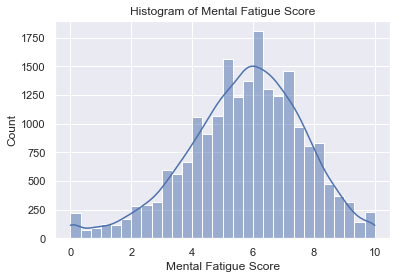

In [11]:
sns.histplot(df['Mental Fatigue Score'], bins=30, kde=True)
plt.title('Histogram of Mental Fatigue Score')

Diketahui skor kelelahan mental karyawan berkisar antara 0 sampai 10. Mayoritas skor kelelahan mental karyawan berada dibawah 6.

Peneliti ingin mengetahui burn rate karyawan.

Text(0.5, 1.0, 'Histogram of Burn Rate')

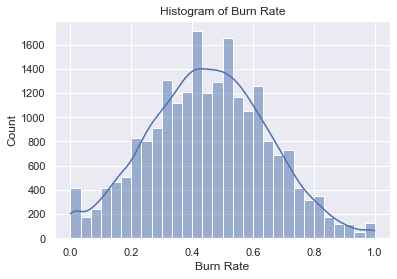

In [12]:
sns.histplot(df['Burn Rate'], bins=30, kde=True)
plt.title('Histogram of Burn Rate')

In [72]:
df['Burn Rate'].mean()

0.4520054563950802

Diketahui skor burn rate karyawan berkisar antara 0 hingga 10. Mayoritas skor burn rate karyawan berada dibawah 5. Rata-rata Burn rate Karyawan adalah 0.45.

Peneliti ingin mengetahui proporsi jenis kelamin karyawan.

Text(0.5, 1.0, 'Proportion of Gender')

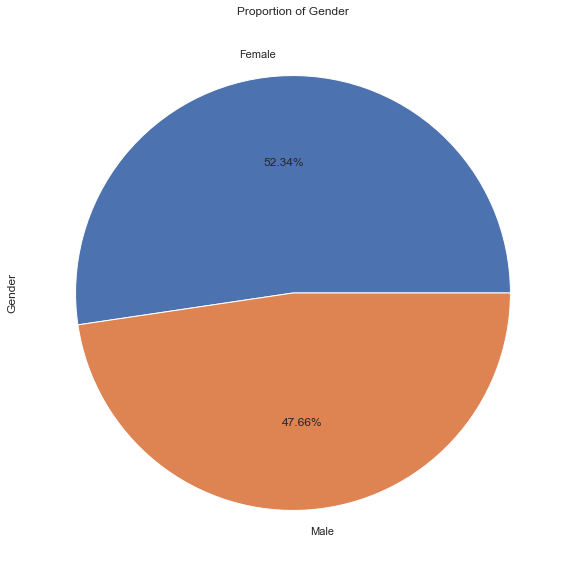

In [8]:
df['Gender'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Proportion of Gender')

Diketahui proporsi karyawan perempuan adalah 52.34% dan proporsi karyawan laki-laki adalah 47.66%

Peneliti ingin mengetahui proporsi jenis perusahaan.

Text(0.5, 1.0, 'Pie Plot of Company Type')

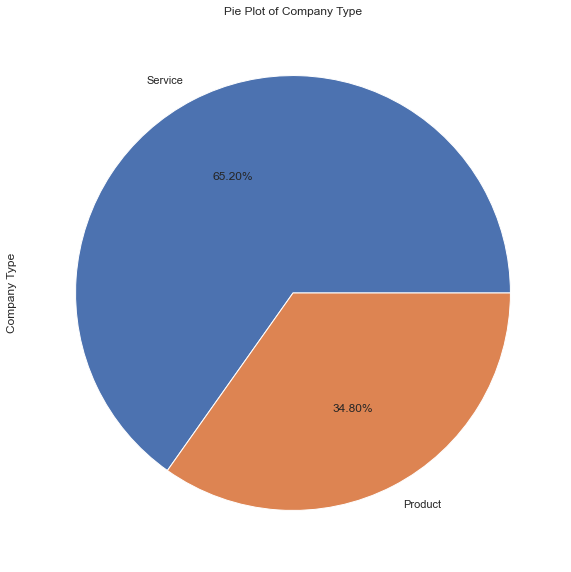

In [17]:
df['Company Type'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Proportion of Company Type')

Diketahui proporsi jenis perusahaan service adalah 65.20% dan proporsi perusahaan product adalah 34.80%.

Peneliti ingin mengetahui proporsi karyawan yang bisa WFH.

Text(0.5, 1.0, 'Proportion of WFH Setup Availabilily')

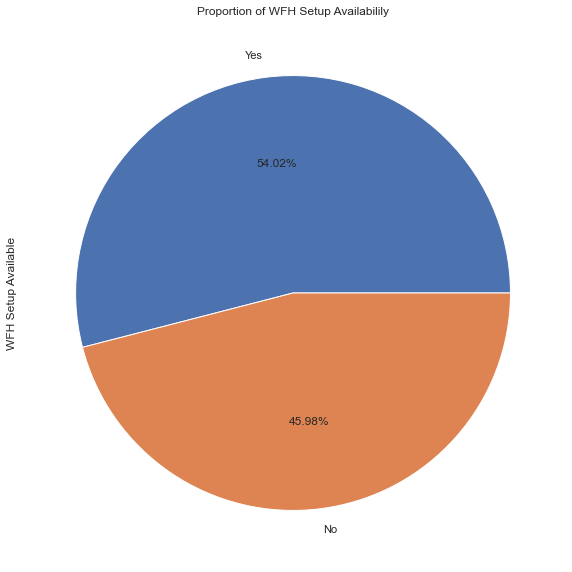

In [9]:
df['WFH Setup Available'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Proportion of WFH Setup Availabilily')

Diketahui terdapat 54.02% karyawan yang bisa melakukan WFH dan 45.98% karyawan yang tidak bisa melakukan WFH.

Peneliti ingin mengetahui proporsi level jabatan karyawan.

Text(0.5, 1.0, 'Pie Plot of Designation')

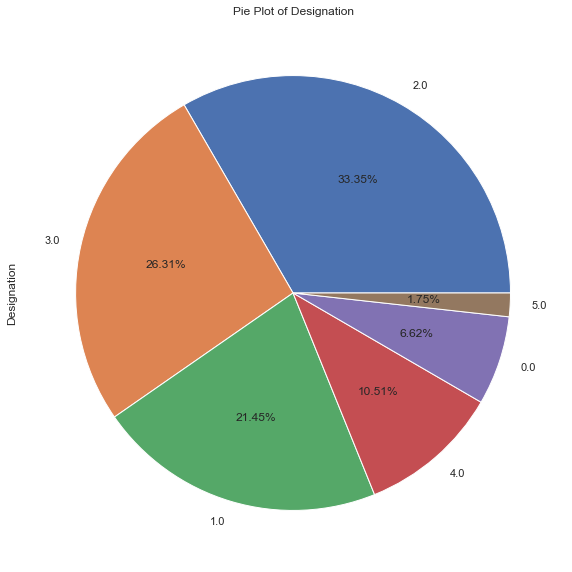

In [18]:
df['Designation'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Pie Plot of Designation')

Diketahui proporsi tertinggi adalah karyawan dengan level jabatan 2 dan proporsi terendah adalah karyawan dengan level jabatan 5.

Peneliti ingin mengetahui hubungan antar variabel numerik.

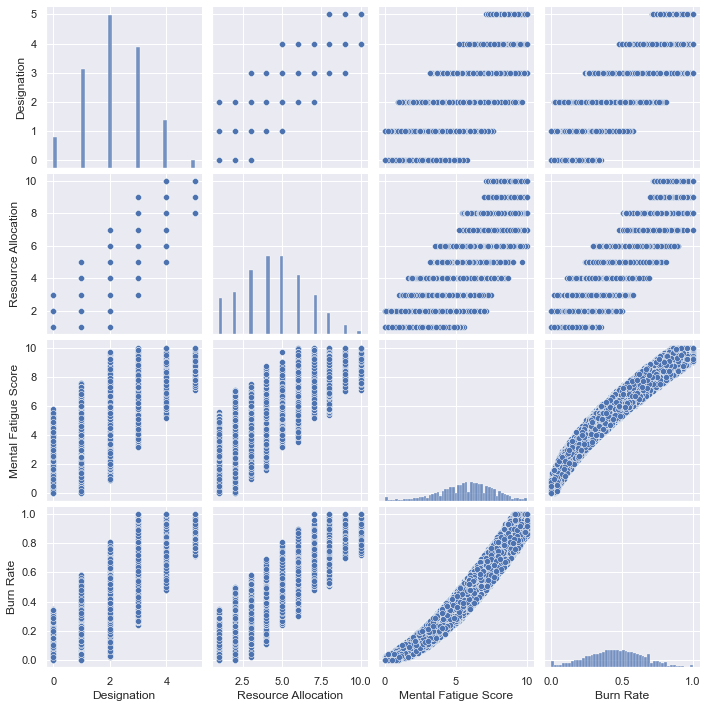

In [19]:
sns.pairplot(df, palette='Dark2')

- Diketahui karyawan dengan level jabatan yang semakin tinggi maka akan cenderung memiliki burn rate yang semakin tinggi.
- Diketahui karyawan yang semakin banyak mengalokasikan waktu untuk bekerja akan cenderung memiliki burn rate yang tinggi.
- Diketahui karyawan yang memiliki skor kelelahan mental yang tinggi cenderung memiliki skor burn rate yang tinggi.

Peneliti ingin mengetahui hubungan antara jenis kelamin dan burn rate.

Text(0.5, 1.0, 'Burn Rate vs Gender')

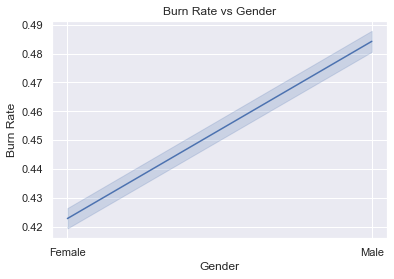

In [25]:
sns.lineplot(x='Gender', y='Burn Rate', data=df)
plt.title('Burn Rate vs Gender')

Diketahui karyawan perempuan cenderung memiliki skor burn rate yang rendah, sedangkan karyawan laki-laki cenderung memiliki skor burn rate yang tinggi.

Peneliti ingin mengetahui hubungan jenis perusahaan dengan  burn rate.

Text(0.5, 1.0, 'Burn Rate vs Company Type')

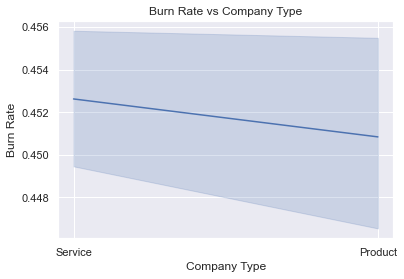

In [24]:
sns.lineplot(x='Company Type', y='Burn Rate', data=df)
plt.title('Burn Rate vs Company Type')

Dikeatahui tidak terdapat hubungan yang kuat antara jenis perusahaan dan burn rate.

Peneliti ingin mengetahui apakah terdapat hubungan antara ketersediaan WFH dan burn rate.

Text(0.5, 1.0, 'Burn Rate vs WFH Availibility')

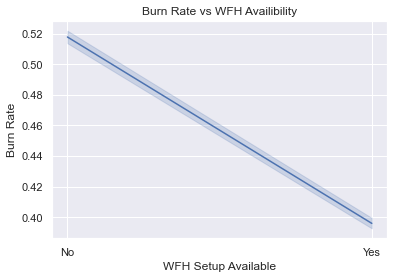

In [23]:
sns.lineplot(x='WFH Setup Available', y='Burn Rate', data=df)
plt.title('Burn Rate vs WFH Availibility')

Diketahui karyawan yang tidak bisa melakukan WFH cenderung memiliki burn rate yang tinggi, sedangkan karyawan yang bisa melakukan WFH memiliki burn rate yang lebih rendah.

Peneliti ingin mengetahui apakah terdapat hubungan antara waktu bergabung dengan perusahaan dengan burn rate

Text(0.5, 1.0, 'Burn Rate vs WFH Availibility')

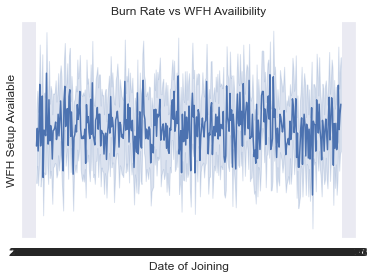

In [24]:
sns.lineplot(x='Date of Joining', y='WFH Setup Available', data=df)
plt.title('Burn Rate vs WFH Availibility')

Diketahui tidak terdapat hubungan yang kuat antara waktu bergabung dengan perusahaan dan burn rate.

## Bab 5 Data Preprocessing

Sebelum dilakukan data preprocessing peneliti akan menduplikasi dataset untuk keperluan pengecekan nantinya

In [16]:
data = df.copy()

Untuk selanjutnya data yang akan diolah adalah data pada dataframe `data` dan dataframe `df` adalah data mentah yang akan digunakan untuk keperluan pengecekan data jika perlu.

### 5.1 Handling Duplicate Data

Peneliti ingin melakukan pengecekan duplicate data.

In [17]:
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate


Diketahui tidak terdapat duplicate data dalam dataset.

### 5.2 Handling Missing Values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [21]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

DIketahui terdapat missing value pada kolom `Resource Allocation` sebanyak 1381 data, `Mental Fatigue Score` sebanyak 2117 data dan `Burn Rate` sebanyak 1124 data. Peneliti beranggapan bahwa missing value pada ketiga kolom tersebut terjadi karena beberapa karyawan tidak mengerjakan test burn rate dan mental score serta tidak mengisi alokasi waktu bekerja dalam survey. Sehingga dengan asumsi tersebut peneliti beranggapan bahwa missing value adalah missing valu completely at random(MCAR). Merujuk pada jenis missing value MCAR dan jumlah missing value yang sedikit jika dibandingkan data keseluruhan, serta terdapat missing value pada variabel yang akan dijadikan target prediksi maka peneliti akan melakukan handling pada missing valur tersebut dengan membuang semua missing value tersebut.

In [22]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


DIketahui missing value berhasil dihandling data siap untuk diproses lebih lanjut.

### 5.3 Handling Cardinality

Peneliti ingin melakukan pengecekan terhadap cardinality pada data kategorikal.

In [12]:
print('Number of categories in the variable Employee ID         : {}'.format(len(data['Employee ID'].unique())))
print('Number of categories in the variable Date of Joining     : {}'.format(len(data['Date of Joining'].unique())))
print('Number of categories in the variable Gender              : {}'.format(len(data['Gender'].unique())))
print('Number of categories in the variable Company Type        : {}'.format(len(data['Company Type'].unique())))
print('Number of categories in the variable WFH Setup Available : {}'.format(len(data['WFH Setup Available'].unique())))

Number of categories in the variable Employee ID         : 18590
Number of categories in the variable Date of Joining     : 366
Number of categories in the variable Gender              : 2
Number of categories in the variable Company Type        : 2
Number of categories in the variable WFH Setup Available : 2


Diketahui terdapat dua kolom yang memiliki high cardinality yaitu :
- `Employee ID`
- `Date of Joining`

Data pada kolom `Employee ID` adalah data mengenai identitas karyawan, sehingga memang seharunya berbeda antar setiap karyawan dan tidak bisa disederhanakan. Oleh karena itu untuk menghandling cardinality pada kolom tersebut penelity akan membuang kolom tersebut.

Data pada kolom `Date of Joining` adalah data mengenai waktu karyawan bergabung dengan perusahaan. Data pada kolom tersebut bisa disederhanakan dengan hanya mengambil bulan bergabungnya saja. Akan tetapi karena waktu bergabung karyawan tidak memiliki  hubungan dengan variabel target maka peneliti tidak akan menggunakan data pada kolom tersebut dan akan membuangnya.

In [25]:
data.drop(columns=['Employee ID','Date of Joining'], inplace=True)

### 5.4 Get Data for Model Inference


Peneliti akan mengambil 10 data secara random untuk keperluan data inference nantinya.

In [26]:
data_inf = data.sample(10, random_state=35)
data_inf 

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
13082,Male,Product,No,3.0,6.0,7.8,0.67
16830,Male,Service,Yes,3.0,8.0,8.2,0.83
2054,Female,Service,Yes,2.0,3.0,3.7,0.27
12184,Female,Service,Yes,0.0,1.0,3.3,0.18
19667,Female,Service,Yes,4.0,8.0,8.1,0.76
939,Female,Service,Yes,2.0,4.0,5.3,0.47
1955,Female,Product,No,5.0,10.0,8.5,0.90
13924,Male,Service,Yes,2.0,5.0,7.5,0.66
13567,Female,Service,No,2.0,3.0,4.0,0.24
9591,Female,Service,No,2.0,6.0,8.0,0.71


Peneliti akan memisahkan data inference dengan dataset utama.

In [27]:
data_train_test = data.drop(data_inf.index)

Peneliti akan melakukan reset index untuk menghidari error pada pemrosesan selanjutnya.

In [28]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Male,Product,No,3.0,6.0,7.8,0.67
1,Male,Service,Yes,3.0,8.0,8.2,0.83
2,Female,Service,Yes,2.0,3.0,3.7,0.27
3,Female,Service,Yes,0.0,1.0,3.3,0.18
4,Female,Service,Yes,4.0,8.0,8.1,0.76
5,Female,Service,Yes,2.0,4.0,5.3,0.47
6,Female,Product,No,5.0,10.0,8.5,0.90
7,Male,Service,Yes,2.0,5.0,7.5,0.66
8,Female,Service,No,2.0,3.0,4.0,0.24
9,Female,Service,No,2.0,6.0,8.0,0.71


### 5.5 Splitting data feature and target

Peneliti akan membagi dataset menjadi dua bagian yaitu data `X` sebagai data feature dan data `y` sebagai data target. Pada penelitian ini target variabel yang akan diprediksi adalah burn rate karyawan. Sehingga kolom yang akan menjadi data `y` adalah kolom `Burn Rate`. Sementara itu variabel lain akan dimasukkan menjadi `X` atau data feature.

In [30]:
X = data_train_test.drop('Burn Rate', axis=1)
y = data_train_test['Burn Rate']
X.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,Female,Service,No,2.0,3.0,3.8
1,Male,Service,Yes,1.0,2.0,5.0
2,Male,Service,Yes,1.0,1.0,2.6
3,Female,Service,No,3.0,7.0,6.9
4,Male,Product,Yes,2.0,4.0,3.6


Setelah memisahkan data target dari data train untuk keperluan membuat model machine learning maka peneliti akan memisahkan data train mejadi dua data set yaitu data train dan data test.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (14864, 6)
Test Size  :  (3716, 6)


### 5.6 Handling Outliers

Peneliti akan mendefinisikan suatu fungsi untuk membantu deteksi outliers.

In [32]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Peneliti akan melakukan deteksi outliers menggunakan boxplot dan histogram.

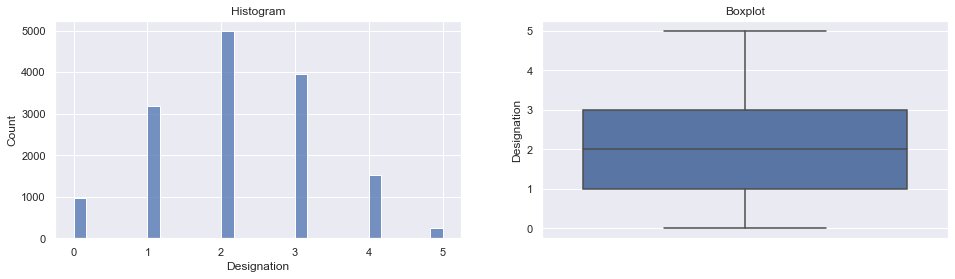

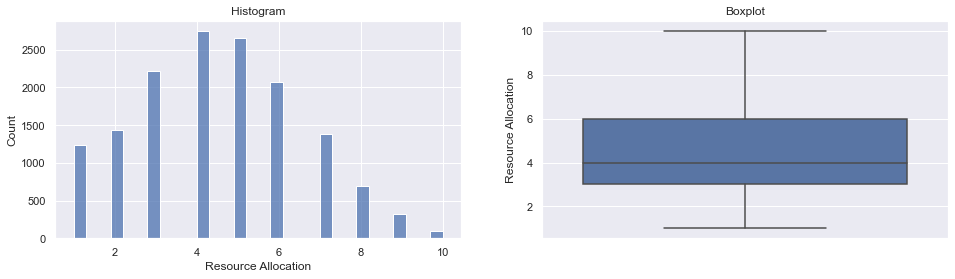

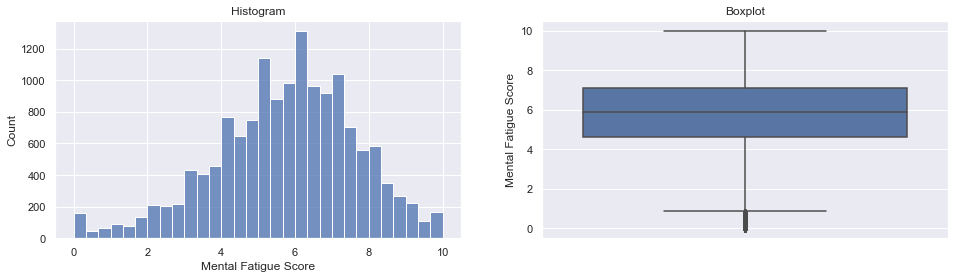

In [33]:
diagnostic_plots(X_train, 'Designation')
diagnostic_plots(X_train, 'Resource Allocation')
diagnostic_plots(X_train, 'Mental Fatigue Score')

Diketahui dari hasil visualisasi menggunakan boxplot terdapat data outliers pada kolom `Mental Fatigue Score`. Kolom `Mental Fatigue Score` memiliki distribusi yang tergolong normal. Sehingga untuk menlakukan handling pada kolom tersebut peneliti akan menggunakan metode capping dengan menggunakan z-score limit.

In [34]:
winsorizer = Winsorizer(capping_method='gaussian', tail='both', fold=3, 
                        variables=['Mental Fatigue Score'])

winsorizer.fit(X_train)

X_train_cap = winsorizer.transform(X_train)

Penelit akan melakukan pengecekan hasil capping.

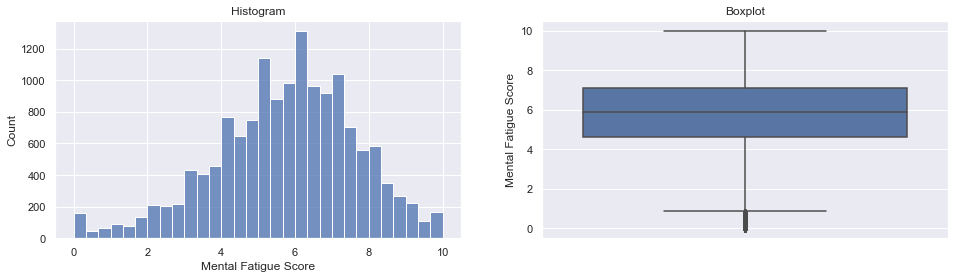

In [35]:
diagnostic_plots(X_train_cap, 'Mental Fatigue Score')

Diketahui tidak terdapat perubahan pada outliers setelah dilakukan capping. Hal tersebut mungkin terjadi karena outliers pada kolom `Mental Fatigue Score` masih berada pada batas yang wajar menurut z-score limit.

### 5.7 Feature Selection

Peneliti akan melakukan pemeilihan data feature dengan melihat korelasi anatar variabel feature dan variabel target.

In [36]:
X_train_feat = X_train_cap.copy()

In [37]:
label = LabelEncoder() 
X_train_feat['Gender'] = label.fit_transform(X_train_cap['Gender'])
X_train_feat['Company Type'] = label.fit_transform(X_train_cap['Company Type'])
X_train_feat['WFH Setup Available'] = label.fit_transform(X_train_cap['WFH Setup Available'])

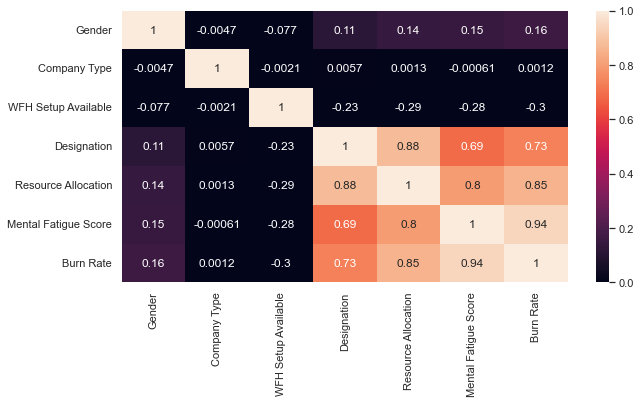

In [38]:
mat_corr = pd.concat([X_train_feat,y_train], axis=1)
corr = mat_corr.corr()


plt.figure(figsize=(10,5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Diketahui variabel yang tidak memiliki korelasi dengan target adalah `Company Type`. Oleh karena itu peneliti tidak akan menggunakan varibel tersebut sebagai data feature.

### 5.8 Split between numerical column and categorical column

Peneliti akan memisahkan kolom numerik dan kolom kategorikal data feature yang telah terpilih untuk keperluan feature scaling dan feature encoding.

In [39]:
num_cols = ['Designation', 'Resource Allocation', 'Mental Fatigue Score']
cat_cols = ['Gender','WFH Setup Available']

In [40]:
X_train_num = X_train_cap[num_cols]
X_train_cat = X_train_cap[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

### 5.8 Feature Scaling

Merujuk pada temuan bahwa semua data numerik memiliki distribusi data yang tergolong normal maka peneliti akan melakukan metode feature scaling dengan menggunakan `StandardScaler`

In [43]:
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[ 0.72765566,  0.2533283 ,  0.92109672],
       [-0.15910942,  0.2533283 ,  0.97323612],
       [-0.15910942, -0.23652104, -0.17383075],
       ...,
       [-1.93263959, -0.72637038, -0.17383075],
       [ 0.72765566,  1.72287632,  1.80746658],
       [ 0.72765566,  0.74317764, -0.74736419]])

### 5.9 Feature Encoding

Peneliti akan melakukan encoding pada data kategorikal dengan menggunakan `OneHotEncoder`.

In [44]:
encoder = OneHotEncoder(sparse=False)
 

encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       ...,
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.]])

### 5.10 Concate between Numerical Column and Categorical Column

Peneliti akan menggabungkan data numerik yang sudah dilakukan scaling dengan data kategorikal yang sudah dilakukan encoding.

In [45]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[ 0.72765566,  0.2533283 ,  0.92109672, ...,  1.        ,
         1.        ,  0.        ],
       [-0.15910942,  0.2533283 ,  0.97323612, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15910942, -0.23652104, -0.17383075, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-1.93263959, -0.72637038, -0.17383075, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.72765566,  1.72287632,  1.80746658, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.72765566,  0.74317764, -0.74736419, ...,  0.        ,
         0.        ,  1.        ]])

## Bab 6 Model Definition

Pada penelitian ini peneliti akan menggunakan 4 model machine learning yang berbeda yaitu :
- `Linear Regression`
- `SVM`
- `Random Forrest`
- `Gradient Boosting`

In [46]:
lin_model = LinearRegression()
svm_model = SVR()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

## Bab 7 Model Training

Peneliti akan melakukan training pada model `Linear Regression`

In [47]:
lin_model.fit(X_train_final, y_train)

LinearRegression()

Peneliti akan melakukan pelatihan pada model `SVM`

In [48]:
svm_model.fit(X_train_final, y_train)

SVR()

Peneliti akan melakukan pelatiahn pada model `Random Forrest`

In [49]:
rf_model.fit(X_train_final, y_train)

RandomForestRegressor()

Peneliti akan melakukan pelatihan terhadap model `Gradient Boosting`

In [50]:
gb_model.fit(X_train_final, y_train)

GradientBoostingRegressor()

## Bab 8 Model Evaluation

Pada bagian evaluasi model peneliti akan melakukan evaluasi keempat model menggunakan cross validation dan membandingkan performanya dalam memprediksi target. Setelah itu peneliti akan memilih model yang terbaik untuk dilakukan hyperparameter tuning dengan menggunakan grid search.

### 8.1 Evaluasi Cross Validation

Peneliti melakuakan cross validation pada masing-masing model dengan 5 kali fold dan metric evaluasi r2 score.

Peneliti melakukan cross validation pada model Linear Regression

In [65]:
cv_lin = cross_val_score(lin_model, X_train_final, y_train, cv=5, scoring='r2')

print('Hasil cross validation       : ',cv_lin)
print('Mean cross validation        : ',cv_lin.mean())
print('Std cross validation         : ',cv_lin.std())

Hasil cross validation       :  [0.92207624 0.91719167 0.91911975 0.91907746 0.9213042 ]
Mean cross validation        :  0.9197538645153083
Std cross validation         :  0.0017447886600937218


Diketahui rata-rata hasil cross validation model Linear Regression adalah 0.919 dan standar deviasinya adalah 0.001.

Peneliti melakukan cross validation pada model SVM

In [66]:
cv_svm = cross_val_score(svm_model, X_train_final, y_train, cv=5, scoring='r2')

print('Hasil cross validation       : ',cv_svm)
print('Mean cross validation        : ',cv_svm.mean())
print('Std cross validation         : ',cv_svm.std())

Hasil cross validation       :  [0.9154641  0.9104851  0.91146318 0.91168809 0.91176399]
Mean cross validation        :  0.9121728924528366
Std cross validation         :  0.00170801838490604


Diketahui rata-rata hasil cross validation model SVM adalah 0.912 dan standar deviasinya adalah 0.001.

Peneliti melakukan cross validation pada model Random Forrest

In [67]:
cv_rf = cross_val_score(rf_model, X_train_final, y_train, cv=5, scoring='r2')

print('Hasil cross validation       : ',cv_rf)
print('Mean cross validation        : ',cv_rf.mean())
print('Std cross validation         : ',cv_rf.std())

Hasil cross validation       :  [0.9144951  0.91400024 0.91606579 0.91637163 0.92057168]
Mean cross validation        :  0.91630088930524
Std cross validation         :  0.002317490253709557


Diketahui rata-rata hasil cross validation model Random Forrest adalah 0.916 dan standar deviasinya adalah 0.002.

Peneliti melakukan cross validation pada model Gradient Boosting

In [68]:
cv_gb = cross_val_score(gb_model, X_train_final, y_train, cv=5, scoring='r2')

print('Hasil cross validation       : ',cv_gb)
print('Mean cross validation        : ',cv_gb.mean())
print('Std cross validation         : ',cv_gb.std())

Hasil cross validation       :  [0.92761308 0.92381009 0.92530564 0.92524119 0.92812351]
Mean cross validation        :  0.9260187019066661
Std cross validation         :  0.0016101675263432255


Diketahui rata-rata hasil cross validation model Gradient Boosting adalah 0.926 dan standar deviasinya adalah 0.001.

Peneliti akan membuat tabel untuk memudahkan membandingkan hasil corss validation.

In [62]:
cv_table = {'lin' : cv_lin, 'svm' : cv_svm, 'rf' : cv_rf, 'gb' : cv_gb}
cv_df = pd.DataFrame(cv_table)
cv_df

,lin,svm,rf,gb
0,0.922076,0.915464,0.914505,0.927613
1,0.917192,0.910485,0.914027,0.923810
2,0.919120,0.911463,0.916039,0.925306
3,0.919077,0.911688,0.915959,0.925241
4,0.921304,0.911764,0.920268,0.928124


Peneliti akan membuat visualisasi untuk membandingkan mean hasil cross validation.

<AxesSubplot:>

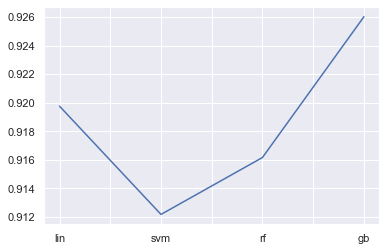

In [63]:
cv_df.mean().plot(kind='line')

Diketahui dari keempat model yang digunakan, model dengan mean R2 Score hasil cross validation yang paling tinggi adalah model Gradient Boosting. Berdasarkan hal tersebut dapat disimpulkan bahwa model Gradient Boosting adalah model yang paling akurat dalam memprediksi target.

Peneliti akan membuat visualisasi untuk membandingkan standar deviasi hasil cross validation.

<AxesSubplot:>

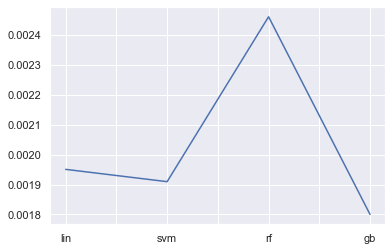

In [64]:
cv_df.std().plot(kind='line')

Diketahui dari keempat model yang dibuat, model dengan standard deviasi R2 Score hasil cross validation yang paling rendah adalah model Gradient Boosting. Merujuk pada temuan tersebut maka dapat disimpulkan bahwa model Gradient Boosting memiliki konsitesi prediksi yang paling tinggi.

Berdasarkan mean dan stadar deviasi hasil cross validation maka dapat disimpulkan bahwa model dengan performa terbaik dalam memprediksi target adalah model Gradient Boosting. Oleh karena itu peneliti akan melakukan hyperparameter tuning dengan model tersebut dengan bantuan Grid Search.

Sebelum dilakukan Grid Search peneliti ingin melakukan evaluasi prediksi model dengan membandingkan anatara prediksi data train dan data set untuk mengetahui apakah model good fit.

In [70]:
y_pred_train_gb = gb_model.predict(X_train_final)
y_pred_test_gb = gb_model.predict(X_test_final)

In [71]:
print('MAE train = ', mean_absolute_error(y_train, y_pred_train_gb))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test_gb))
print(' ')
print('MSE train = ', mean_squared_error(y_train, y_pred_train_gb))
print('MSE test = ', mean_squared_error(y_test, y_pred_test_gb))
print(' ')
print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_gb)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_gb)))
print(' ')
print('r2score train = ', r2_score(y_train, y_pred_train_gb))
print('r2score test = ', r2_score(y_test, y_pred_test_gb))

MAE train =  0.04325420712793712
MAE test =  0.0432617977220206
 
MSE train =  0.0028148030868473312
MSE test =  0.0027783361697567067
 
RMSE train =  0.053054717856636756
RMSE test =  0.05270992477472062
 
r2score train =  0.927739401127223
r2score test =  0.9301862950946874


Diketahui R2 Score prediksi data train adalah 0.927 dan prediksi data test adalah 0.930. Merujuk pada R2 Score yang tinggi pada prediksi data train dan selisih R2 Score yang tidak terlalu jauh maka model dapat dikatakan good fit. Berdasarkan hasil evaluasi dengan menggunakan metric MAE diketahui bahwa rata-rata error dalam prediksi adalah sebesar 0.043 dan dengan metric MSE diketahui  bahwa rata-rata error dalam prediksi adalah sebesar 0.053. Merujuk pada temuan sebelumnya bahwa rata-rata Burn rate karyawan adalah 0.43 maka error dalam prediksi cukup besar.

### 8.2 Evaluasi Grid Search

Peneliti akan melakukan hyperparameter tuning pada model untuk mencoba meningkatkan performa model. Parameter yang akan dilakukan hyperparameter tuning adalah :
- `n_estimator` untuk mengatur banyaknya boosting stages yang dilakukan.
- `learning_rate` untuk mengatur kontribusi setiap decision tree dalam sequence yang dibuat.
- `min_saples_leaf` untuk mengatur sample minimum dalam leaf nodes, baik dilakukan pada regression model.
- `max_depth` untuk mengatur kedalaman setiap decision tree dalam model.
- `random_state` untuk mengatur konsistensi pemecahan pemecahan decision nodes.

In [74]:
param = [{'n_estimators': [40, 80, 120, 160],
        'learning_rate': [0.2, 0.4, 0.6, 0.8],
        'min_samples_leaf' : [ 2, 4, 6, 8],
        'max_depth' : [2, 4],
        'random_state' : [35]}]

In [75]:
grid_search = GridSearchCV(gb_model, param_grid=param, cv=5, scoring='r2')

In [76]:
grid_search.fit(X_train_final, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 120, 'random_state': 35}
Best cross-validation score: 0.93


Diketahui dari hasil Grid Serach bahwa kombinasi hyperparameter tuning yang terbaik adalah:
- `learning_rate`: 0.2 
- `max_depth`: 4
- `min_samples_leaf`: 4 
- `n_estimators`: 120 
- `random_state`: 35

Merujuk pada hasil tersebut maka peneliti akan membuat model dengan rekomendasi hyperparameter tersebut.

In [77]:
final_model = GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_leaf=4, n_estimators=120, random_state=35)

Peneliti akan melakukan evaluasi dengan metric R2 Score, MAE dan MSE pada model yang telah dilakukan hyperparameter tuning.

In [78]:
final_model.fit(X_train_final, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_leaf=4,
                          n_estimators=120, random_state=35)

In [79]:
y_pred_train_final = final_model.predict(X_train_final)
y_pred_test_final = final_model.predict(X_test_final)

In [80]:
print('MAE train = ', mean_absolute_error(y_train, y_pred_train_final))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test_final))
print(' ')
print('MSE train = ', mean_squared_error(y_train, y_pred_train_final))
print('MSE test = ', mean_squared_error(y_test, y_pred_test_final))
print(' ')
print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train_final)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test_final)))
print(' ')
print('r2score train = ', r2_score(y_train, y_pred_train_final))
print('r2score test = ', r2_score(y_test, y_pred_test_final))

MAE train =  0.041687139005019976
MAE test =  0.04251305971165335
 
MSE train =  0.00266380318876595
MSE test =  0.0027247705969329797
 
RMSE train =  0.05161204499693797
RMSE test =  0.05219933521543143
 
r2score train =  0.9316158154725369
r2score test =  0.9315322845163085


Diketahui R2 Score pada data train naik menjadi 0.931 dan data test menjadi 0.931. Dari hasil tersebut dapat disimpulkan bahwa model yang dilakukan hyperparameter tuning adalah good fit. Selain itu berdasarkan metric MAE ditemukan rata-rata error turun menjadi 0.041 dan metric MSE juga terjadi penurunan yaitu 0.051. Berdsarkan evaluasi tersebut dapat disimpulkan bahwa hyperparameter tuning yang dilakukan meningkatkan performa model.

## Bab 9 Model Inference

### 9.1 Make Pipeline

Peneliti akan membuat pipeline untuk memdahkan penyimpanan model

In [119]:
num_pipeline = make_pipeline(Winsorizer(capping_method='gaussian', tail='both', fold=3),
                            StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_cols),
    ('pipe_cat', cat_pipeline, cat_cols)
])

# final pipeline
final_pipeline = make_pipeline(data_pipeline, final_model)


Peneliti akan melakukan pengecekan pada pipeline yang sudah dibuat.

In [120]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(tail='both')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Designation',
                                                   'Resource Allocation',
                                                   'Mental Fatigue Score']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'WFH Setup Available'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=4,
                                           min_samples_leaf=4, n_estimators=120,
                                           random_state=35))])

In [121]:
train_pred = final_pipeline.predict(X_train)
test_pred = final_pipeline.predict(X_test)

In [122]:
print('r2score train = ', r2_score(y_train, train_pred))
print('r2score test = ', r2_score(y_test, test_pred))

r2score train =  0.9316158154725369
r2score test =  0.9315322845163085


Diketahui pipeline yang sudah dibuat berfungsi dengan baik.

### 9.2 Model Saving

In [124]:
with open("burnout_pipe.pkl", "wb") as model_file:
    pickle.dump(final_pipeline, model_file)

### 9.4 Model Loading

In [125]:
with open("burnout_pipe.pkl", "rb") as model_file:
    burnout = pickle.load(model_file)

### 9.5 Model Inference

Peneliti akan melakukan model inferencing untuk mencocokan prediksi model dengan data inference

In [126]:
data_inf

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Male,Product,No,3.0,6.0,7.8,0.67
1,Male,Service,Yes,3.0,8.0,8.2,0.83
2,Female,Service,Yes,2.0,3.0,3.7,0.27
3,Female,Service,Yes,0.0,1.0,3.3,0.18
4,Female,Service,Yes,4.0,8.0,8.1,0.76
5,Female,Service,Yes,2.0,4.0,5.3,0.47
6,Female,Product,No,5.0,10.0,8.5,0.90
7,Male,Service,Yes,2.0,5.0,7.5,0.66
8,Female,Service,No,2.0,3.0,4.0,0.24
9,Female,Service,No,2.0,6.0,8.0,0.71


Peneliti akan melakukan prediksi pada data inference

In [129]:
y_pred_inf = burnout.predict(data_inf)

In [132]:
y_pred_inf_df = pd.DataFrame(np.round(y_pred_inf, decimals=2), columns=['burn_rate_pred'])
y_pred_inf_df

,burn_rate_pred
0,0.65
1,0.77
2,0.25
3,0.19
4,0.73
5,0.39
6,0.83
7,0.61
8,0.26
9,0.65


Peneliti akan menyatukan prediksi model dan data inference untuk memudahkan evaluasi.

In [133]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,burn_rate_pred
0,Male,Product,No,3.0,6.0,7.8,0.67,0.65
1,Male,Service,Yes,3.0,8.0,8.2,0.83,0.77
2,Female,Service,Yes,2.0,3.0,3.7,0.27,0.25
3,Female,Service,Yes,0.0,1.0,3.3,0.18,0.19
4,Female,Service,Yes,4.0,8.0,8.1,0.76,0.73
5,Female,Service,Yes,2.0,4.0,5.3,0.47,0.39
6,Female,Product,No,5.0,10.0,8.5,0.90,0.83
7,Male,Service,Yes,2.0,5.0,7.5,0.66,0.61
8,Female,Service,No,2.0,3.0,4.0,0.24,0.26
9,Female,Service,No,2.0,6.0,8.0,0.71,0.65


Diketahui terdapat 3 prediksi dari model yang memiliki error lebih dari 0.05, sedangkan 7 prediksi yang memiliki error kurang dari sama dengan 0.05.

## Bab 10 Pengambilan Kesimpulan

### 10.1 Insight EDA

Berdasarkan hasil EDA ditemukan beberapa insight yaitu :

- Diketahui karyawan  paling awal bergabung pada tanggal 1 Januari 2008 dan yang terakhir bergabung pada 31 Desember 2008.
- Diketahui waktu yang dialokasikan karyawan untuk bekerja berkisar antara 1 jam hingga 10 jam. Mayoritas karyawan mengalokasikan waktu untuk bekerja dibawah 6 jam.
- Diketahui skor kelelahan mental karyawan berkisar antara 0 sampai 10. Mayoritas skor kelelahan mental karyawan berada dibawah 6.
- Diketahui skor burn rate karyawan berkisar antara 0 hingga 10. Mayoritas skor burn rate karyawan berada dibawah 5. Rata-rata Burn rate Karyawan adalah 0.45.
- Diketahui proporsi karyawan perempuan adalah 52.34% dan proporsi karyawan laki-laki adalah 47.66%.
- Diketahui proporsi jenis perusahaan service adalah 65.20% dan proporsi perusahaan product adalah 34.80%.
- Diketahui terdapat 54.02% karyawan yang bisa melakukan WFH dan 45.98% karyawan yang tidak bisa melakukan WFH.
- Diketahui proporsi tertinggi adalah karyawan dengan level jabatan 2 dan proporsi terendah adalah karyawan dengan level jabatan 5.
- Diketahui karyawan dengan level jabatan yang semakin tinggi maka akan cenderung memiliki burn rate yang semakin tinggi.
- Diketahui karyawan yang semakin banyak mengalokasikan waktu untuk bekerja akan cenderung memiliki burn rate yang tinggi.
- Diketahui karyawan yang memiliki skor kelelahan mental yang tinggi cenderung memiliki skor burn rate yang tinggi.
- Diketahui karyawan perempuan cenderung memiliki skor burn rate yang rendah, sedangkan karyawan laki-laki cenderung memiliki skor burn rate yang tinggi.
- Dikeatahui tidak terdapat hubungan yang kuat antara jenis perusahaan dan burn rate.
- Diketahui karyawan yang tidak bisa melakukan WFH cenderung memiliki burn rate yang tinggi, sedangkan karyawan yang bisa melakukan WFH memiliki burn rate yang lebih rendah.
- Diketahui tidak terdapat hubungan yang kuat antara waktu bergabung dengan perusahaan dan burn rate.


### 10.2 Kesimpulan Analisis Model

Pada penelitian ini dibuat 4 model machine learning untuk memprediksi burn rate karyawan yaitu dengan Linear Regression, SVM, Random Forrest dan Gradient Boosting. Keempat model tersebut kemudian menggunakan metode cross validation menggunakan metric R2 Score. Hasil dari cross validation tersebut ditemukan model dengan akurasi prediksi dan konsistensi yang tertinggi adalah model Gradient Boosting.

Model Gradient Boosting kemudian dievaluasi kembali dengan membandingkan prediksi antara data train dan data set. Hasil dari evaluasi tersebut ditemukan bahwa R2 Score prediksi data train adalah 0.927 dan prediksi data test sebesar 0.930. Berdasarkan evaluasi tersebut dapat disimpulkan bahwa model good fit. Meskipun demikian evaluasi menggunakan metric MAE dan MSE menunjukkan error sebesar masing-masing 0.43 dan 0.53. Merujuk pada rata-rata burn rate karyawan yaitu 0.43 errr pada prediksi model cukup besar. Oleh karena itu peneliti menciba untuk melakukan hyperparameter tuning untuk meningkatkan performa model.

Hyperparameter tuning yang pada model dilakukan dengan bantuan Grid Search. Parameter yang dilakukan hyperparameter tuning adalah learning_rate, max_depth, min_samples_leaf, n_estimators, dan random_state. Hasil dari grid serach menunjukkan bahwa kombinasi hyperparameer tuning yang terbaik adalah learning_rate: 0.2 , max_depth: 4, min_samples_leaf: 4, n_estimators: 120 dan random_state: 35

Setelah mendapatkan rekomendasi hyperparameter tuning yang terbaik peneliti kemudian membuat model dengan hyperparameter yang direkomendasikan. Peneliti kemudian melakukan evaluasi kembali terhadap model menggunakan metric R2 Score dan membandingkan performanya dalam memprediksi data test dan data train. Hasil dari evaluasi tersbut ditemukan adanay peningkatan pada R2 Score data train sebesar 0.931 dan data test sebesar 0.931. Sehingga dapat disimpulkan setelah dilakukan hyperparameter tuning performa model meningkat dan masih dapat dikatakan good fit. Peneliti juga menggunakan metric MAE dan MSE untuk melihat error prediksi. DIketahui dari hasil evaluasi tersebut skor MAE turun menjadi 0.041 dan MSE turun menjadi 0.053. Sehingga dapat disimpulkan bahwa hyperparameter tuning yang dilakukan dapat mengurangi error dari prediksi.

Merujuk berdasarakan semua temuan yang dilakukan dalam proses pembuatan model machine leraning maka peneliti akan menyarankan penggunaan model yang telah dibuat kepada CEO Perusahaan Sukamaju untuk dapat memprediksi burn out rate dari karyawannnya.

Saran untuk pembuatan model selanjutnya adalah untuk melakukan hyperparameter tuning pada model untuk mencari tahu apakah performa model masih bisa ditingkatkan lagi. Selain itu bisa dibuat model supervised learning untuk membantu mengelompokkan karyawan mana yang sudah burnout untuk memudahkan intervensi.